## Basic characteristics of anisotropic images

##### Created: 2020.08.25

##### Modified: 2020.08.26

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

from pathlib import Path
from fastai.utils.mem import *

In [3]:
import sys
sys.path.append('functions')

%aimport functions00, functions01
from functions00 import *
from functions01 import *

In [4]:
mk_get_host_info()

**********************************************************************************************************************************
Settings:
	HOST:  mmiv-ml-titan
	PATH_ROOT_DATA:  /data-10tb/shared/skull/train-3d-iso
	PATH_GIT_HUB:  /data-10tb/marek/github_codes/skull-stripping-1/fastai
	PATH_2D: /data-10tb/shared/skull

3D NIFTI image DF paths (_mk_3D):
	IXI_TEST_3D: /data-10tb/marek/github_codes/skull-stripping-1/fastai/2.2_train_valid_test_sets/ixi_test_mk_3d.csv
	TEST_3D : /data-10tb/marek/github_codes/skull-stripping-1/fastai/2.2_train_valid_test_sets/test_mk_3d.csv
	TRAIN_VAL_3D: /data-10tb/marek/github_codes/skull-stripping-1/fastai/2.2_train_valid_test_sets/train_val_mk_3d.csv
	NFBS_TEST_3D: /data-10tb/marek/github_codes/skull-stripping-1/fastai/2.2_train_valid_test_sets/nfbs_test_mk_3d.csv

Error files (pickle):
	ERROR_FILES: /data-10tb/marek/github_codes/skull-stripping-1/fastai/2.2_train_valid_test_sets/error_files
***********************************************************

#### Global variables

In [5]:
ANISO_PTH = Path(f'/data-10tb/marek/github_codes/skull-stripping-1/fastai/1.0_results/')

### T1_bias Aniso

In [6]:
bias_ixi = pd.read_excel(ANISO_PTH/'ixi_aniso.xlsx', sheet_name='t1_bias_im')
bias_adni = pd.read_excel(ANISO_PTH/'adni_aniso.xlsx', sheet_name='t1_bias_im')
bias_aibl = pd.read_excel(ANISO_PTH/'aibl_aniso.xlsx', sheet_name='t1_bias_im')
bias_ppmi = pd.read_excel(ANISO_PTH/'ppmi_aniso.xlsx', sheet_name='t1_bias_im')
bias_slim = pd.read_excel(ANISO_PTH/'slim_aniso.xlsx', sheet_name='t1_bias_im')
bias_sald = pd.read_excel(ANISO_PTH/'sald_aniso.xlsx', sheet_name='t1_bias_im')
bias_cc = pd.read_excel(ANISO_PTH/'cc_aniso.xlsx', sheet_name='t1_bias_im')
#bias_hcp = pd.read_excel(ANISO_PTH/'hcp_aniso.xlsx', sheet_name='t1_bias_im')

In [7]:
bias_cc.head(2)

,Examination,Image,Max,Mean,Min,Dtype,Size_1,Size_2,Size_3,Pixdim_1,Pixdim_2,Pixdim_3
0,CC0001_philips_15_55_M.anat,T1_biascorr.nii.gz,2659.811523,352.307226,0,float64,171,256,170,0.999998,1.000000,1.000000
1,CC0002_philips_15_56_M.anat,T1_biascorr.nii.gz,3477.040527,425.928278,0,float64,150,288,191,1.000000,0.888889,0.888889


In [8]:
name_list = ['ixi', 'adni', 'aibl', 'ppmi', 'slim', 'sald', 'cc']
df_list = [bias_ixi, bias_adni, bias_aibl, bias_ppmi, bias_slim, bias_sald, bias_cc]

dct = dict(zip(name_list, df_list))

### Voxes sizes and spacing

In [9]:
def volume_size(dct, key, print_full_res=False):
    s_ixi = np.vstack((dct[key].Size_1, dct[key].Size_2, dct[key].Size_3 )).T
    val, cnt = np.unique(s_ixi, axis=0, return_counts=True)
    df = pd.DataFrame.from_dict({'cnt':list(cnt), 'dimension':list(val)})
    df = df.sort_values(by='cnt', ascending=False)
    if print_full_res:
        print(f'{key.upper()} - voxelsize (Voxelsizes: {len(cnt)})')
        _ = [print(f'\t{v} ---> {c}')  for v,c in zip(val, cnt)]
        print()
    return df

In [10]:
def spacing(dct, key, digits=2, print_full_res=False):
    p_ixi = np.vstack((dct[key].Pixdim_1, dct[key].Pixdim_2, dct[key].Pixdim_3 )).T
    val, cnt = np.unique(p_ixi.round(digits), axis=0, return_counts=True)
    
    df = pd.DataFrame.from_dict({'cnt':list(cnt), 'dimension':list(val)})
    df = df.sort_values(by='cnt', ascending=False)
    if print_full_res:
        print(f'{key.upper()} - pixelsize (Pixelsizes: {len(cnt)})')
        _ = [print(f'\t{v} ---> {c}')  for v,c in zip(val, cnt)]
        print()
    return df

### Spacing

In [11]:
for k in dct.keys():
    d1 = spacing(dct, k, digits=1)
    mk_wrap_text(f'{k} (exams: {len(dct[k])})')
    print(d1)
    print(f'\n\n')

**************************
*** ixi (exams: 581)   ***
**************************
   cnt        dimension
0  576  [1.2, 0.9, 0.9]
1    5  [1.2, 1.0, 1.0]



****************************
*** adni (exams: 7921)   ***
****************************
     cnt        dimension
2   3977  [1.2, 1.0, 1.0]
0   2208  [1.2, 0.9, 0.9]
4    520  [1.2, 1.2, 1.2]
5    407  [1.2, 1.2, 1.3]
6    402  [1.2, 1.3, 1.2]
7    212  [1.2, 1.3, 1.3]
3     99  [1.2, 1.1, 1.1]
1     84  [1.2, 0.9, 1.0]
9      9  [1.2, 1.4, 1.4]
8      1  [1.2, 1.3, 1.4]
10     1  [1.3, 0.9, 0.9]
11     1  [1.4, 1.2, 1.2]



***************************
*** aibl (exams: 726)   ***
***************************
   cnt        dimension
0  726  [1.2, 1.0, 1.0]



***************************
*** ppmi (exams: 752)   ***
***************************
   cnt        dimension
0  749  [1.0, 1.0, 1.0]
1    3  [1.2, 1.1, 1.1]



****************************
*** slim (exams: 1036)   ***
****************************
    cnt        dimension
0  1036  [

### Image sizes

In [12]:
for k in dct.keys():
    d1 = volume_size(dct, k, False)
    mk_wrap_text(f'{k} (exams: {len(dct[k])})')
    print(d1)
    print(f'\n\n')

**************************
*** ixi (exams: 581)   ***
**************************
   cnt        dimension
4  498  [150, 256, 181]
2   74  [146, 256, 181]
3    5  [150, 256, 174]
0    2  [130, 256, 181]
1    2  [140, 256, 181]



****************************
*** adni (exams: 7921)   ***
****************************
     cnt        dimension
56  2127  [176, 240, 170]
17  1028  [160, 192, 136]
78  1005  [196, 256, 167]
37   752  [170, 256, 170]
33   727  [166, 256, 180]
..   ...              ...
47     1  [170, 288, 184]
49     1  [172, 256, 167]
50     1  [176, 192, 136]
51     1  [176, 192, 137]
40     1  [170, 256, 173]

[80 rows x 2 columns]



***************************
*** aibl (exams: 726)   ***
***************************
   cnt        dimension
0  726  [160, 240, 170]



***************************
*** ppmi (exams: 752)   ***
***************************
    cnt        dimension
4   600  [176, 240, 170]
6    93  [176, 256, 170]
8    23  [192, 240, 170]
7    17  [176, 256, 174]
1  

___

### T1 -Max and mean values

In [13]:
mx = pd.DataFrame({'ixi':bias_ixi['Max'], 'adni':bias_adni['Max'], 'ppmi':bias_ppmi['Max'], 
                  'aibl':bias_aibl['Max'], 'sald':bias_sald['Max'], 'slim':bias_slim['Max'], 'cc':bias_cc['Max']})
mx.head().round(0)

,ixi,adni,ppmi,aibl,sald,slim,cc
0,1070.0,2749.0,946.0,892.0,888.0,1229.0,2660.0
1,3636.0,2552.0,929.0,914.0,797.0,1229.0,3477.0
2,3979.0,2273.0,746.0,804.0,983.0,1387.0,2964.0
3,4007.0,3662.0,916.0,968.0,1237.0,1547.0,4850.0
4,3952.0,2431.0,845.0,935.0,1095.0,1406.0,3131.0


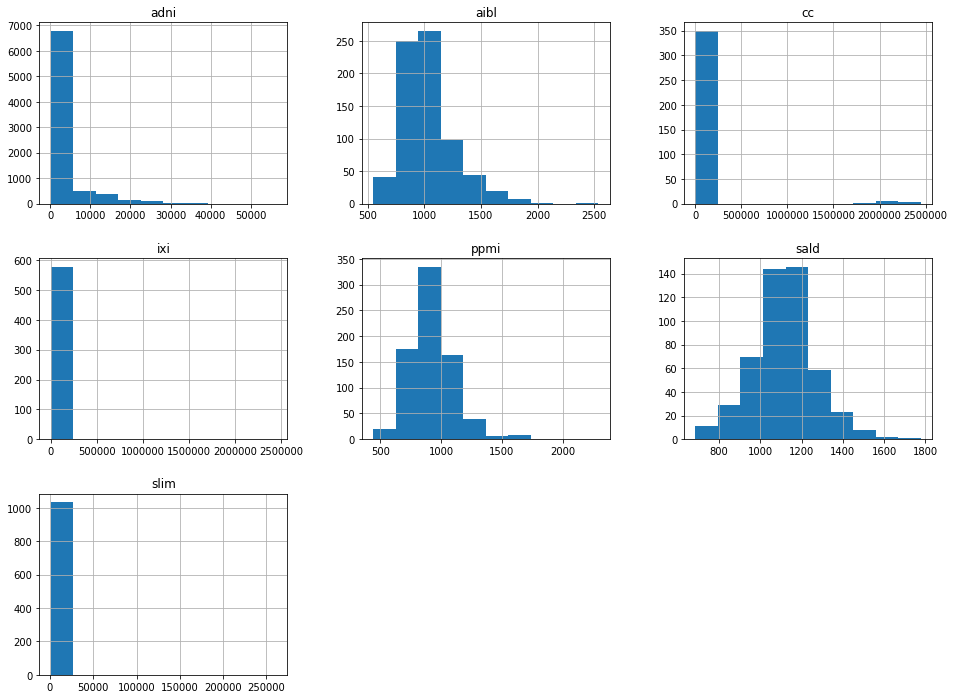

In [14]:
_= pd.DataFrame.hist(mx, figsize=(16,12))

In [18]:
mx.adni.max()

55883.5625

In [15]:
mean1 = pd.DataFrame({'ixi':bias_ixi['Mean'], 'adni':bias_adni['Mean'], 'ppmi':bias_ppmi['Mean'], 
                  'aibl':bias_aibl['Mean'], 'sald':bias_sald['Mean'], 'slim':bias_slim['Mean'], 'cc':bias_cc['Mean']})
mean1.head().round(0)

,ixi,adni,ppmi,aibl,sald,slim,cc
0,120.0,267.0,99.0,83.0,71.0,100.0,352.0
1,416.0,265.0,118.0,86.0,89.0,127.0,426.0
2,408.0,267.0,87.0,103.0,104.0,169.0,353.0
3,315.0,244.0,110.0,121.0,109.0,106.0,364.0
4,362.0,248.0,104.0,105.0,125.0,155.0,353.0


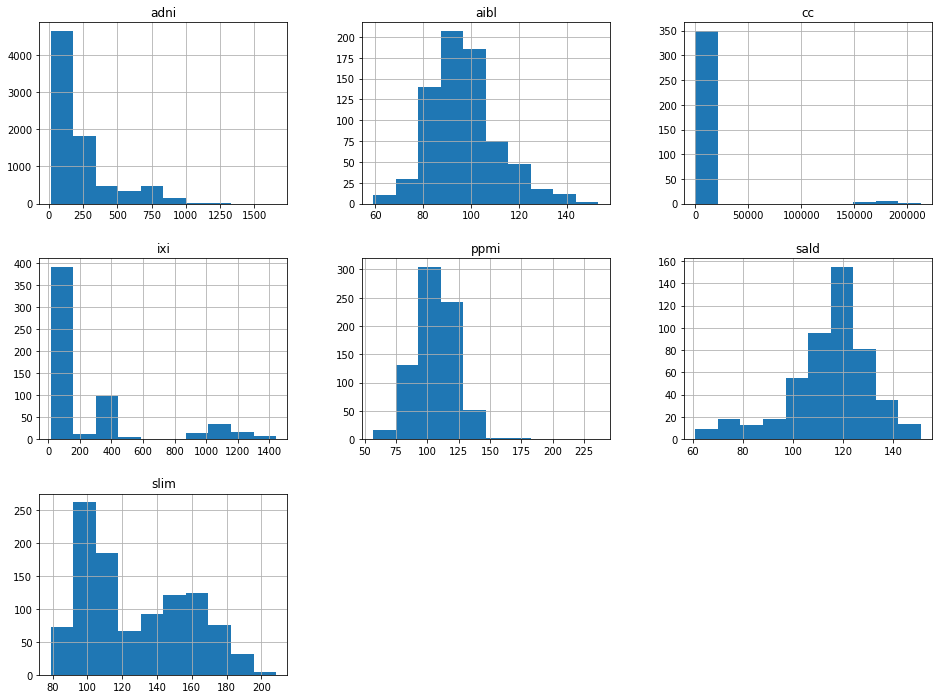

In [16]:
_= pd.DataFrame.hist(mean1, figsize=(16,12))

(0, 8000)

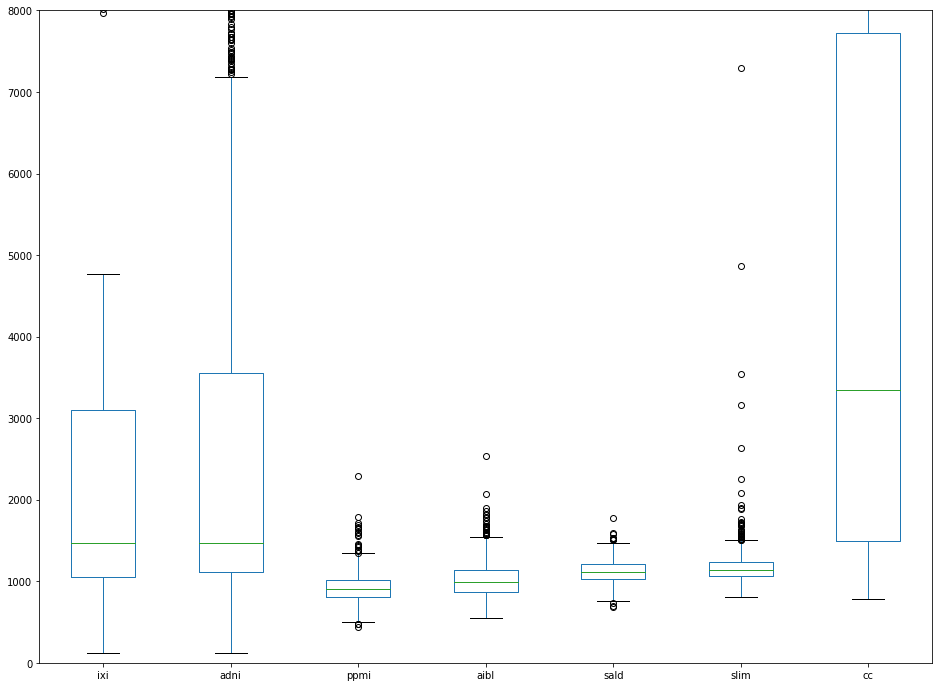

In [17]:
ax1 = mx.plot(kind='box', figsize=(16,12))
ax1.set_ylim(0,8000)

(0, 600)

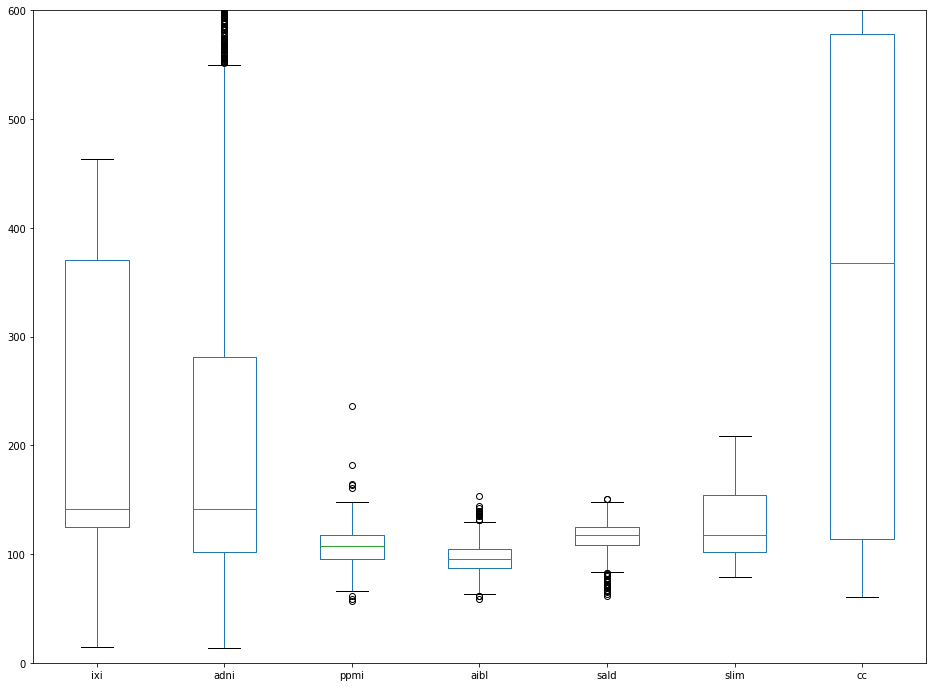

In [18]:
ax2 = mean1.plot(kind='box', figsize=(16,12))
ax2.set_ylim(0,600)